In [1]:
import sys
sys.path.append("../../CellMate/")
from skimage.io import imread
from tqdm import trange
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from cellmate.utils import load_from_pkl, dump_to_pkl
from tqdm import trange, tqdm
import seaborn as sns
from cellmate.image_measure import ImageMeasure
import pandas as pd
from cellmate.mating import CellNetwork, CellNetwork90
from cellmate.mating import prediction_cell_type
from cellmate.visualize import COLORMAP, COLOR
from cellmate.mating._patch import intensity_multiple_points
%load_ext autoreload
%autoreload 2

In [2]:
from cellmate.utils import load_from_pkl
from cellmate.mating import CellNetwork
from cellmate.visualize import COLORMAP, COLOR

In [3]:
root = "/Volumes/T7/data/scd2/20240607_2scd2_gfp_002/crop"
file_list = list(Path(root).rglob("*igid___08_01_tracked.tif"))
file_list.sort()
file_list

[PosixPath('/Volumes/T7/data/scd2/20240607_2scd2_gfp_002/crop/3_rigid___08_01_tracked.tif')]

In [4]:
file_name = file_list[0]
print(file_name)
stem = file_name.with_stem(file_name.stem[:-8])
image = imread(file_name)
masks = image[:, -1]
cellnet = load_from_pkl(Path(stem).with_suffix(".cellnet"))

/Volumes/T7/data/scd2/20240607_2scd2_gfp_002/crop/3_rigid___08_01_tracked.tif


/Users/wlli/miniconda3/envs/yeast/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator NearestNeighbors from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
fluorenscent_image = image[0:30, 2:3]
flu_masks = image[0:30, -1]

In [6]:
cell_types, fc = prediction_cell_type(fluorenscent_image, flu_masks, channel_number=1, bg_threshold=10, fc_threshold=50, n_components=2)

In [65]:
cell_id = 6
frames = cellnet.cells[cell_id].frames
for time in frames:
    cell_label_t = cellnet.label_trans(time)[cell_id]
    coord = cellnet.measure[time].coordinate(label=cell_label_t)

In [124]:
from cellmate.mating._patch import intensity_multiple_points, center_bg_norm
from scipy.ndimage import gaussian_filter1d
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
t = 78
cell_label_t = cellnet.label_trans(frames[t])[cell_id]
coord = cellnet.measure[frames[t]].coordinate(label=cell_label_t)
data, bg = intensity_multiple_points(image[frames[t],1], coord, 7, (image[frames[t],-1]%1000 ==cell_id))

In [202]:
intensity_norm = data - bg
intensity_norm = intensity_norm.clip(0, None)
# intensity_norm = intensity_norm / bg
# intensity_norm = intensity_norm / np.nanmedian(intensity_norm)
smooth = gaussian_filter1d(intensity_norm, 1.5)

In [205]:
bg

32897.0

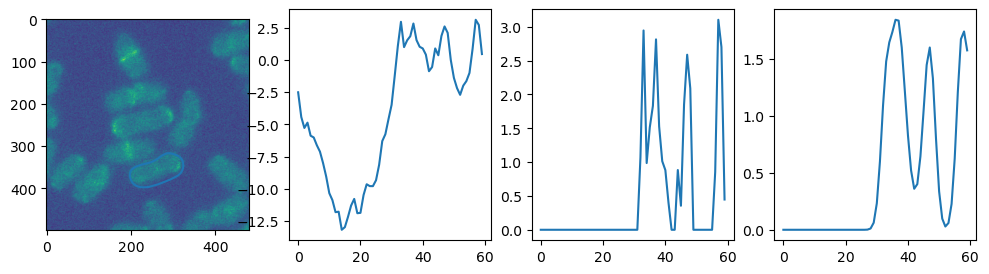

In [204]:
fig, ax = plt.subplots(1, 4, figsize=(12,3))
ax[0].imshow(image[frames[t],1])
ax[0].plot(coord[:,1],coord[:,0])
ax[1].plot(data-bg)
ax[2].plot(intensity_norm)
ax[3].plot(smooth)

In [120]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example data
smoothed_data = gaussian_filter1d(data, sigma=1)  # Adjust sigma for smoothness
print(smoothed_data)

[1 2 3 4 5 6 6 7 8 9]


In [64]:
mask = (image[frames[-1],-1]%1000 ==cell_id)
flu_image = image[frames[-1],1]
x, y = circle_grid(flu_image.shape)
print(image.shape)
intensities = []
radius = 5
for center in coord[10:11]:
    distance = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    mask_i = (distance <= radius) & mask
    circular_region = flu_image[mask_i]
    # non_zero_pixels = circular_region[circular_region]

NameError: name 'circle_grid' is not defined

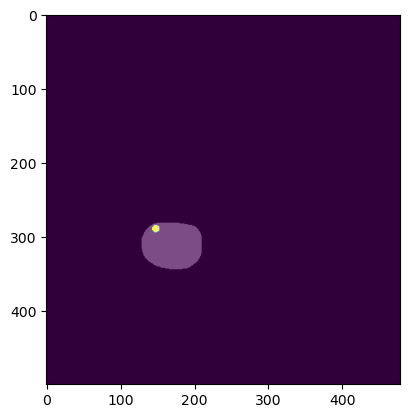

In [267]:
plt.imshow(mask_i)
plt.imshow(mask, "gray", alpha=0.3)

In [20]:
a = [1]

In [21]:
a.append(-1)

In [22]:
a

[1, -1]

In [23]:
a.append(5)

In [24]:
a

[1, -1, 5]